# Thank You for opening this notebook!!!

## This notebook is for introduction to the MLens library
 In this notebook i have performed feature seleaction, Correlational plot, trained custom models like e.g. svm,Randomforest,etc.
 
1. Support Vector Classifier(SVC)
2. Random Forest Classifier
3. LogisticRegression
4. DecisionTreeClassifier
5. GaussianNB
6. KNeighborsClassifier
7. AdaBoostClassifier
8. BaggingClassifier  
9. ExtraTreesClassifier
10. Gradient boosting classifer
    

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/60k-stack-overflow-questions-with-quality-rate/valid.csv
/kaggle/input/60k-stack-overflow-questions-with-quality-rate/train.csv
/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv
/kaggle/input/youtube-new/GBvideos.csv
/kaggle/input/youtube-new/MXvideos.csv
/kaggle/input/youtube-new/KRvideos.csv
/kaggle/input/youtube-new/MX_category_id.json
/kaggle/input/youtube-new/GB_category_id.json
/kaggle/input/youtube-new/US_category_id.json
/kaggle/input/youtube-new/IN_category_id.json
/kaggle/input/youtube-new/DEvideos.csv
/kaggle/input/youtube-new/KR_category_id.json
/kaggle/input/youtube-new/RU_category_id.json
/kaggle/input/youtube-new/FRvideos.csv
/kaggle/input/youtube-new/USvideos.csv
/kaggle/input/youtube-new/INvideos.csv
/kaggle/input/youtube-new/RUvideos.csv
/kaggle/input/youtube-new/CA_category_id.json
/kaggle/input/youtube-new/DE_category_id.json
/kaggle/input/youtube-new/JP_category_id.json
/kaggle/input/youtube-new/JPvideos.csv
/kaggle/input/youtube-ne

In [2]:
# plottting lib
import seaborn as sns
import matplotlib.pyplot as plt

import xgboost
from xgboost import XGBClassifier
### pre-processing lib
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn. model_selection import train_test_split,GridSearchCV,KFold,cross_val_predict,RandomizedSearchCV
### classification lib required
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier,VotingClassifier,StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import KernelPCA,PCA
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC
## different metrices
from sklearn.metrics import accuracy_score,r2_score

## importing data 

In [3]:
data=pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### see variance, S.D. and mean so that we can think about normalization or not 

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### co-relation plot for seeing how much data corelated to predicting label

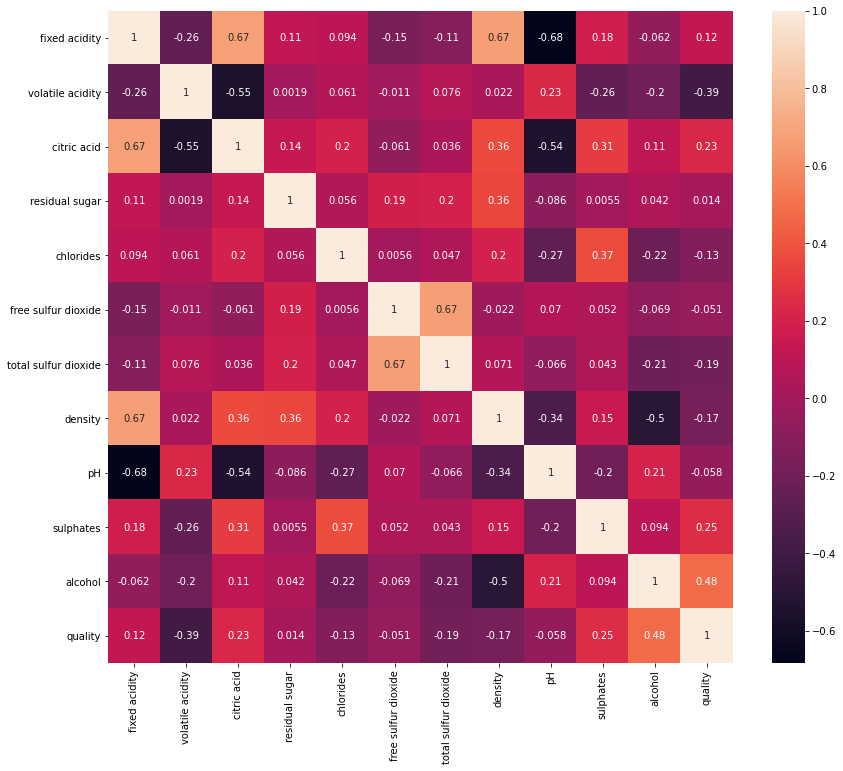

In [5]:
corelation=data.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corelation,annot=True)

### Simple feature Selection we are going to perform 

In [6]:
corelation['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [7]:
corelation.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
selected_features=['volatile acidity', 'citric acid','sulphates', 'alcohol','quality']

Text(0.5, 1.0, 'Scatter Matrix plot of selected features.')

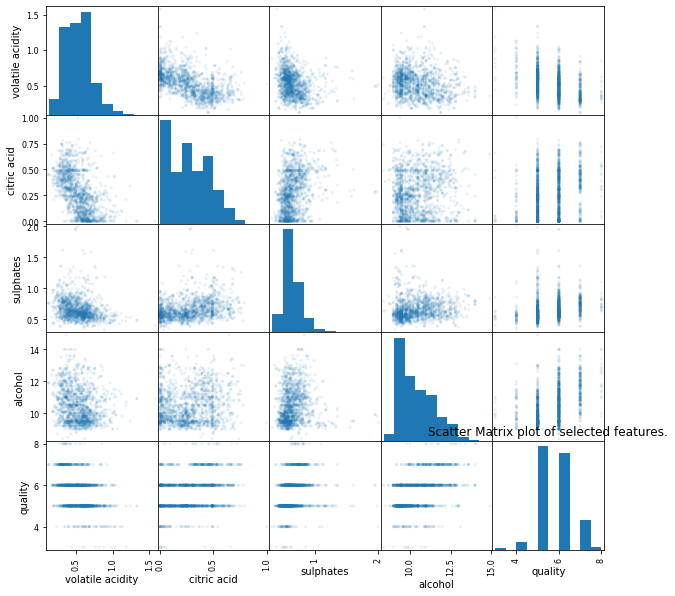

In [9]:
feat_data=data[selected_features]
pd.plotting.scatter_matrix(feat_data,alpha=0.1,figsize=(10,10))
plt.title('Scatter Matrix plot of selected features.')

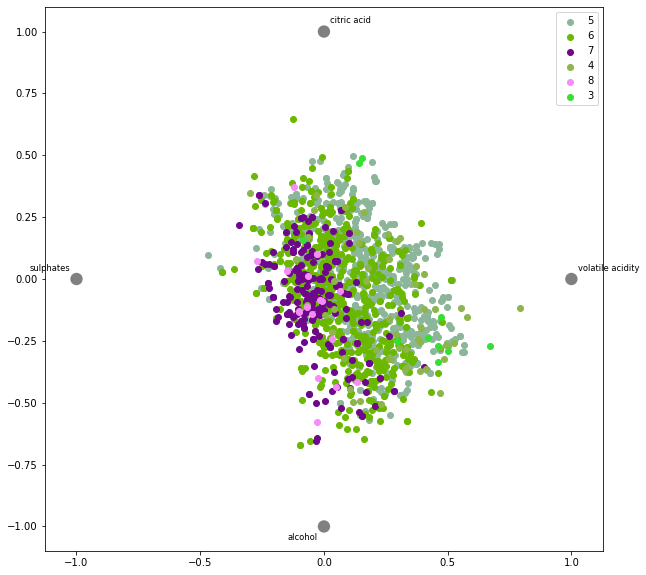

In [10]:
plt.figure(figsize=(10,10))
pd.plotting.radviz(feat_data,'quality')

### lets split out data 

### i have commented below lines beacuase i am using feature selection but it eventually giving less accuracy and f1-score hence i consider taking full dataset with all columns and rows

In [11]:
#labels=feat_data.pop('quality')
#X_train,X_test,y_train,y_test=train_test_split(feat_data,labels,test_size=0.2,random_state=42)

In [12]:
labels=feat_data.pop('quality')
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)

In [13]:
#X_train,y_train

## lets see how much accuracy we get through some normal classifiers

lets start with first our fav. classifier which is *svm*

### support vector machine classifier

In [14]:
svm=SVC(gamma='scale', probability=True)
svm.fit(X_train,y_train)

svm_pred=svm.predict(X_test)
print("*"* 30)
score=accuracy_score(y_test,svm_pred)
print("SVM accuracy is :{}".format(score))

******************************
SVM accuracy is :0.5375


### Random Forest Classifier

In [15]:
random_f=RandomForestClassifier(n_estimators=250)
random_f.fit(X_train,y_train)
random_f_pred=random_f.predict(X_test)
print("*"* 30)
score=accuracy_score(y_test,random_f_pred)
print("random forest accuracy is :{}".format(score))

******************************
random forest accuracy is :0.98125


### Logistic Regression

In [16]:
log=LogisticRegression(solver='liblinear')
log.fit(X_train,y_train)
pred=log.predict(X_test)
print("*"* 30)
score=accuracy_score(y_test,pred)
print("LogisticRegression accuracy is :{}".format(score))

******************************
LogisticRegression accuracy is :0.896875


### Decision Tree Classifier

In [17]:
Decision=DecisionTreeClassifier()
Decision.fit(X_train,y_train)
pred=Decision.predict(X_test)
print("*"* 30)
score=accuracy_score(y_test,pred)
print("DecisionTreeClassifier accuracy is :{}".format(score))

******************************
DecisionTreeClassifier accuracy is :1.0


### Nearest Neighbour classifier 

In [18]:
guassian=GaussianNB()
guassian.fit(X_train,y_train)
pred=guassian.predict(X_test)
print("*"* 30)
score=accuracy_score(y_test,pred)
print("GaussianNB accuracy is :{}".format(score))

******************************
GaussianNB accuracy is :1.0


### k-nearest neighbors Classifier

In [19]:
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)
pred=KNN.predict(X_test)
print("*"* 30)
score=accuracy_score(y_test,pred)
print("KNeighborsClassifier accuracy is :{}".format(score))

******************************
KNeighborsClassifier accuracy is :0.58125


### AdaBoost Classifier

In [20]:
Ada=AdaBoostClassifier()
Ada.fit(X_train,y_train)
pred=Ada.predict(X_test)
print("*"* 30)
score=accuracy_score(y_test,pred)
print("AdaBoostClassifier accuracy is :{}".format(score))

******************************
AdaBoostClassifier accuracy is :0.8375


### BaggingClassifier

In [21]:
Bagging=BaggingClassifier(n_estimators=300)
Bagging.fit(X_train,y_train)
pred=Bagging.predict(X_test)
print("*"* 30)
score=accuracy_score(y_test,pred)
print("BaggingClassifier accuracy is :{}".format(score))

******************************
BaggingClassifier accuracy is :1.0


### ExtraTrees Classifier

In [22]:
Ex_Tree=ExtraTreesClassifier(n_estimators=300)
Ex_Tree.fit(X_train,y_train)
pred=Ex_Tree.predict(X_test)
print("*"* 30)
score=accuracy_score(y_test,pred)
print("ExtraTreesClassifier accuracy is :{}".format(score))

******************************
ExtraTreesClassifier accuracy is :1.0


### Extreme gradient boosting classifier.

In [23]:
XGB=XGBClassifier()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)
print("*"* 30)
score=accuracy_score(y_test,pred)
print("XGBClassifier accuracy is :{}".format(score))

******************************
XGBClassifier accuracy is :1.0


upto this point we created simple models lets combine them so that they can act as an base model and from that we can train our meta model so that we can get significant amount of result.

## Super-learner model 

1. Define function in which all the model you want to use
2. put them into and single list as shown below return it.

In [24]:
def get_models():
	models = list()
	models.append(LogisticRegression(solver='liblinear'))
	models.append(DecisionTreeClassifier())
	models.append(SVC(gamma='scale', probability=True))
	models.append(GaussianNB())
	models.append(KNeighborsClassifier())
	models.append(AdaBoostClassifier())
	models.append(BaggingClassifier(n_estimators=10))
	models.append(RandomForestClassifier(n_estimators=10))
	models.append(ExtraTreesClassifier(n_estimators=10))
	models.append(XGBClassifier())
	return models

### if you have face any error regarding mlens.
### make sure you have install mlens lib using 
> !pip install mlens
> 

In [25]:
!pip install mlens

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


import mlens and define super learners.

here base learner means this model learn something and based on this models output we are going to train our original model. basically its like public poll on the social topics or any topic this is an base idea behind this concept.

In [26]:
import mlens
from mlens.ensemble import SuperLearner
def get_super_learner(X):
	ensemble = SuperLearner(scorer=accuracy_score, folds=10, shuffle=True, sample_size=len(X))
	# add base models
	models = get_models()
	ensemble.add(models)
	# add the meta model
	ensemble.add_meta(LogisticRegression(solver='lbfgs'))
	return ensemble

[MLENS] backend: threading


In [27]:
ensemble = get_super_learner(X_train)

In [28]:
# fit the super learner
ensemble.fit(X_train.values,y_train.values)
# summarize base learners
print(ensemble.data)

# make predictions on hold out set
## here i face error with an pandas dataframe input hence i convert it into numpy array 
##may be mlens lib still not support direct pipeline of pandas dataframe
## may be they will fix this issue further :)

yhat = ensemble.predict(X_test.values)

print("*"* 30)
score=accuracy_score(y_test,yhat)
print("Super Learner accuracy is :{}".format(score))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/mlens/parallel/_base_functions.py:313: ParameterChangeWarning: Parameter value ('multi:softprob') has changed since model was fitted ('binary:logistic').
  (lpar, rpar), ParameterChangeWarning)
/opt/conda/lib/python3.7/site-packages/mlens/parallel/_base_functions.py:313: ParameterChangeWarning: Parameter value ('multi:softprob') has changed since model was fitted ('binary:logistic').
  (lpar, rpar), ParameterChangeWarning)
/opt/co

                                   score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  adaboostclassifier           0.84     0.02  0.74  0.03  0.10  0.01
layer-1  baggingclassifier            1.00     0.00  0.15  0.02  0.01  0.00
layer-1  decisiontreeclassifier       1.00     0.00  0.01  0.01  0.00  0.00
layer-1  extratreesclassifier         0.99     0.01  0.12  0.03  0.01  0.00
layer-1  gaussiannb                   1.00     0.00  0.01  0.00  0.00  0.00
layer-1  kneighborsclassifier         0.59     0.04  0.01  0.00  0.09  0.03
layer-1  logisticregression           0.89     0.03  0.07  0.00  0.00  0.00
layer-1  randomforestclassifier       0.98     0.02  0.13  0.02  0.01  0.00
layer-1  svc                          0.54     0.04  0.82  0.26  0.02  0.01
layer-1  xgbclassifier                1.00     0.00  1.02  0.13  0.02  0.01

******************************
Super Learner accuracy is :0.996875


In [29]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00       130
           6       0.99      1.00      1.00       132
           7       1.00      1.00      1.00        42
           8       1.00      0.80      0.89         5

    accuracy                           1.00       320
   macro avg       1.00      0.97      0.98       320
weighted avg       1.00      1.00      1.00       320



* **Here i got an result of almost 99% hence we can consider this an significant result**
* **here is no overfitting happening and we can clearly see that with using super learner techinqe we can obtain significant results.**

### **Note: this notebook goal is not achieve maximum result.. it is for learning and understanding the new concept and its utilization**

## **please...if you have read this notebook upto this point  and if you like make sure to upvote this notebook so that it will give some boost to work hard****